# Heart Disease Prediction:

In this Machine Learning Project, I have colleect all the dataset from kaggle and I will use the Machine learning to predict whether any person is suffering from heart disease.

In [1]:
import pandas as pd
import numpy as np

## Loading Data

In [2]:
data = pd.read_csv('heart.csv')

In [60]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.shape

(303, 14)

In [7]:
y = data['target'].values
X = data.drop(['target'], axis=1)
X.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2


## Checking Data Imbalanced or not.

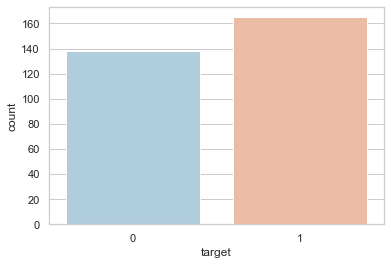

In [57]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=data,palette='RdBu_r')

#### Almost equal distribution of target variable.
target(0) is nearly 140 and target(1) is sighlty above than 160.
we can say that this is roughly 40:60 ratio distributon.
So, this data is balanced.

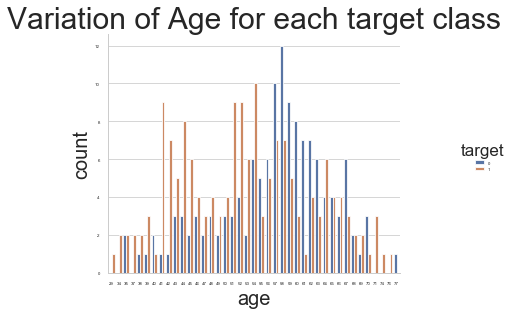

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper", font_scale = 0.5, rc = {"font.size": 40,"axes.titlesize": 30,"axes.labelsize": 20}) 
sns.catplot(kind = 'count', data = data, x = 'age', hue = 'target', order = data['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

We can see that most people who are suffering are age of 58, folloewd by 57.

Majority people who are 50+ are suffering from heart disease.

## Splitting the Data

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

## Making Data Model Ready

### Encoding Age feature

In [13]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['age'].values.reshape(1,-1))

X_train_age_norm = normalizer.transform(X_train['age'].values.reshape(1,-1))
X_cv_age_norm = normalizer.transform(X_cv['age'].values.reshape(1,-1))
X_test_age_norm = normalizer.transform(X_test['age'].values.reshape(1,-1))


X_train_age_norm=X_train_age_norm.reshape(-1,1)
X_cv_age_norm=X_cv_age_norm.reshape(-1,1)
X_test_age_norm=X_test_age_norm.reshape(-1,1)


### Encoding Sex Feature

In [14]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['sex'].values.reshape(1,-1))

X_train_sex_norm = normalizer.transform(X_train['sex'].values.reshape(1,-1))
X_cv_sex_norm = normalizer.transform(X_cv['sex'].values.reshape(1,-1))
X_test_sex_norm = normalizer.transform(X_test['sex'].values.reshape(1,-1))



X_train_sex_norm=X_train_sex_norm.reshape(-1,1)
X_cv_sex_norm=X_cv_sex_norm.reshape(-1,1)
X_test_sex_norm=X_test_sex_norm.reshape(-1,1)


### Encoding cp Feature:

In [15]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['cp'].values.reshape(1,-1))

X_train_cp_norm = normalizer.transform(X_train['cp'].values.reshape(1,-1))
X_cv_cp_norm = normalizer.transform(X_cv['cp'].values.reshape(1,-1))
X_test_cp_norm = normalizer.transform(X_test['cp'].values.reshape(1,-1))


X_train_cp_norm=X_train_cp_norm.reshape(-1,1)
X_cv_cp_norm=X_cv_cp_norm.reshape(-1,1)
X_test_cp_norm=X_test_cp_norm.reshape(-1,1)


### Encoding trestbsp Feature:

In [23]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['trestbps'].values.reshape(1,-1))

X_train_trestbps_norm = normalizer.transform(X_train['trestbps'].values.reshape(1,-1))
X_cv_trestbps_norm = normalizer.transform(X_cv['trestbps'].values.reshape(1,-1))
X_test_trestbps_norm = normalizer.transform(X_test['trestbps'].values.reshape(1,-1))


X_train_trestbps_norm=X_train_trestbps_norm.reshape(-1,1)
X_cv_trestbps_norm=X_cv_trestbps_norm.reshape(-1,1)
X_test_trestbps_norm=X_test_trestbps_norm.reshape(-1,1)


### Encoding chol Feature:

In [24]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['chol'].values.reshape(1,-1))

X_train_chol_norm = normalizer.transform(X_train['chol'].values.reshape(1,-1))
X_cv_chol_norm = normalizer.transform(X_cv['chol'].values.reshape(1,-1))
X_test_chol_norm = normalizer.transform(X_test['chol'].values.reshape(1,-1))


X_train_chol_norm=X_train_chol_norm.reshape(-1,1)
X_cv_chol_norm=X_cv_chol_norm.reshape(-1,1)
X_test_chol_norm=X_test_chol_norm.reshape(-1,1)


### Encoding fbs Feature:

In [25]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['fbs'].values.reshape(1,-1))

X_train_fbs_norm = normalizer.transform(X_train['fbs'].values.reshape(1,-1))
X_cv_fbs_norm = normalizer.transform(X_cv['fbs'].values.reshape(1,-1))
X_test_fbs_norm = normalizer.transform(X_test['fbs'].values.reshape(1,-1))


X_train_fbs_norm=X_train_fbs_norm.reshape(-1,1)
X_cv_fbs_norm=X_cv_fbs_norm.reshape(-1,1)
X_test_fbs_norm=X_test_fbs_norm.reshape(-1,1)


### Encoding restecg Feature:

In [26]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['restecg'].values.reshape(1,-1))

X_train_restecg_norm = normalizer.transform(X_train['restecg'].values.reshape(1,-1))
X_cv_restecg_norm = normalizer.transform(X_cv['restecg'].values.reshape(1,-1))
X_test_restecg_norm = normalizer.transform(X_test['restecg'].values.reshape(1,-1))


X_train_restecg_norm=X_train_restecg_norm.reshape(-1,1)
X_cv_restecg_norm=X_cv_restecg_norm.reshape(-1,1)
X_test_restecg_norm=X_test_restecg_norm.reshape(-1,1)


### Encoding thalach Feature:

In [27]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['thalach'].values.reshape(1,-1))

X_train_thalach_norm = normalizer.transform(X_train['thalach'].values.reshape(1,-1))
X_cv_thalach_norm = normalizer.transform(X_cv['thalach'].values.reshape(1,-1))
X_test_thalach_norm = normalizer.transform(X_test['thalach'].values.reshape(1,-1))


X_train_thalach_norm=X_train_thalach_norm.reshape(-1,1)
X_cv_thalach_norm=X_cv_thalach_norm.reshape(-1,1)
X_test_thalach_norm=X_test_thalach_norm.reshape(-1,1)


### Encoding Exang Feature:

In [28]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['exang'].values.reshape(1,-1))

X_train_exang_norm = normalizer.transform(X_train['exang'].values.reshape(1,-1))
X_cv_exang_norm = normalizer.transform(X_cv['exang'].values.reshape(1,-1))
X_test_exang_norm = normalizer.transform(X_test['exang'].values.reshape(1,-1))


X_train_exang_norm=X_train_exang_norm.reshape(-1,1)
X_cv_exang_norm=X_cv_exang_norm.reshape(-1,1)
X_test_exang_norm=X_test_exang_norm.reshape(-1,1)


### Encoding oldpeak Feature:

In [29]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['oldpeak'].values.reshape(1,-1))

X_train_oldpeak_norm = normalizer.transform(X_train['oldpeak'].values.reshape(1,-1))
X_cv_oldpeak_norm = normalizer.transform(X_cv['oldpeak'].values.reshape(1,-1))
X_test_oldpeak_norm = normalizer.transform(X_test['oldpeak'].values.reshape(1,-1))


X_train_oldpeak_norm=X_train_oldpeak_norm.reshape(-1,1)
X_cv_oldpeak_norm=X_cv_oldpeak_norm.reshape(-1,1)
X_test_oldpeak_norm=X_test_oldpeak_norm.reshape(-1,1)


### Encoding Slope Feature:

In [30]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['slope'].values.reshape(1,-1))

X_train_slope_norm = normalizer.transform(X_train['slope'].values.reshape(1,-1))
X_cv_slope_norm = normalizer.transform(X_cv['slope'].values.reshape(1,-1))
X_test_slope_norm = normalizer.transform(X_test['slope'].values.reshape(1,-1))


X_train_slope_norm=X_train_slope_norm.reshape(-1,1)
X_cv_slope_norm=X_cv_slope_norm.reshape(-1,1)
X_test_slope_norm=X_test_slope_norm.reshape(-1,1)


### Encoding Ca Feature:

In [31]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['ca'].values.reshape(1,-1))

X_train_ca_norm = normalizer.transform(X_train['ca'].values.reshape(1,-1))
X_cv_ca_norm = normalizer.transform(X_cv['ca'].values.reshape(1,-1))
X_test_ca_norm = normalizer.transform(X_test['ca'].values.reshape(1,-1))


X_train_ca_norm=X_train_ca_norm.reshape(-1,1)
X_cv_ca_norm=X_cv_ca_norm.reshape(-1,1)
X_test_ca_norm=X_test_ca_norm.reshape(-1,1)


### Encoding Thal Feature:

In [32]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['thal'].values.reshape(1,-1))

X_train_thal_norm = normalizer.transform(X_train['thal'].values.reshape(1,-1))
X_cv_thal_norm = normalizer.transform(X_cv['thal'].values.reshape(1,-1))
X_test_thal_norm = normalizer.transform(X_test['thal'].values.reshape(1,-1))


X_train_thal_norm=X_train_thal_norm.reshape(-1,1)
X_cv_thal_norm=X_cv_thal_norm.reshape(-1,1)
X_test_thal_norm=X_test_thal_norm.reshape(-1,1)


### Concaitinating all the features:

In [36]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = np.hstack((X_train_age_norm,X_train_sex_norm,X_train_cp_norm,X_train_trestbps_norm,X_train_chol_norm,X_train_fbs_norm,X_train_restecg_norm,X_train_thalach_norm,X_train_exang_norm,X_train_oldpeak_norm,X_train_slope_norm,X_train_ca_norm,X_train_thal_norm))
X_cr = np.hstack((X_cv_thal_norm,X_cv_ca_norm,X_cv_slope_norm,X_cv_oldpeak_norm,X_cv_exang_norm,X_cv_thalach_norm,X_cv_restecg_norm,X_cv_fbs_norm,X_cv_chol_norm,X_cv_trestbps_norm,X_cv_cp_norm,X_cv_sex_norm,X_cv_age_norm))
X_te = np.hstack((X_test_thal_norm,X_test_ca_norm,X_test_slope_norm,X_test_oldpeak_norm,X_test_exang_norm,X_test_thalach_norm,X_test_restecg_norm,X_test_fbs_norm,X_test_chol_norm,X_test_trestbps_norm,X_test_cp_norm,X_test_sex_norm,X_test_age_norm))


print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(136, 13) (136,)
(67, 13) (67,)
(100, 13) (100,)


In [59]:
X_tr

array([[0.08368121, 0.10369517, 0.        , ..., 0.05643326, 0.06388766,
        0.10896491],
       [0.08058191, 0.10369517, 0.        , ..., 0.11286653, 0.12777531,
        0.10896491],
       [0.09607843, 0.        , 0.        , ..., 0.        , 0.12777531,
        0.07264327],
       ...,
       [0.06818469, 0.10369517, 0.06375767, ..., 0.11286653, 0.        ,
        0.07264327],
       [0.09762808, 0.10369517, 0.        , ..., 0.05643326, 0.06388766,
        0.10896491],
       [0.08368121, 0.10369517, 0.        , ..., 0.05643326, 0.06388766,
        0.10896491]])

### Decision Trees:

In [37]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth = 3)

clf = decision_tree.fit(X_tr ,y_train)


In [38]:
import seaborn as sea
DT = DecisionTreeClassifier()


parameters = {'max_depth': [1, 5, 10, 50, 100, 500], 'min_samples_split': [5, 10, 100, 500]}

classifier = RandomizedSearchCV(DT, parameters, cv=3, scoring='roc_auc',return_train_score=True,verbose=10)
classifier.fit(X_tr, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] min_samples_split=100, max_depth=1 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_split=100, max_depth=1, score=(train=0.500, test=0.500), total=   0.2s
[CV] min_samples_split=100, max_depth=1 ..............................
[CV]  min_samples_split=100, max_depth=1, score=(train=0.500, test=0.500), total=   0.0s
[CV] min_samples_split=100, max_depth=1 ..............................
[CV]  min_samples_split=100, max_depth=1, score=(train=0.500, test=0.500), total=   0.0s
[CV] min_samples_split=10, max_depth=50 ..............................
[CV]  min_samples_split=10, max_depth=50, score=(train=0.988, test=0.627), total=   0.0s
[CV] min_samples_split=10, max_depth=50 ..............................
[CV]  min_samples_split=10, max_depth=50, score=(train=0.972, test=0.862), total=   0.0s
[CV] min_samples_split=10, max_depth=50 ..............................
[CV]  min_samples_split=10, max_depth=50, score=(train=0.979, test=0.801), total=   0.0s
[CV] min_samples_split=5, max_depth=100 ..............................
[CV]  min_samples_split=5, max_depth=100

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [1, 5, 10, 50, 100, 500],
                                        'min_samples_split': [5, 10, 100, 500]},
                   return_train_score=True, scoring='roc_auc', verbose=10)

In [39]:
#Output of RandomCV

print('Best score: ',classifier.best_score_)
print('k value with best score: ',classifier.best_params_)
print('='*75)
print('Train AUC scores')
print(classifier.cv_results_['mean_train_score'])
print('CV AUC scores')
print(classifier.cv_results_['mean_test_score'])

Best score:  0.766079365079365
k value with best score:  {'min_samples_split': 10, 'max_depth': 5}
Train AUC scores
[0.5        0.97978691 0.99877409 0.5        0.97251954 0.5
 0.98181153 0.99917901 0.99917901 0.5       ]
CV AUC scores
[0.5        0.76325661 0.74819048 0.5        0.76607937 0.5
 0.76260847 0.73851852 0.74903968 0.5       ]


### Random Forest

In [50]:
# https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

grid_params = {'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}
 
gs = GridSearchCV(rf, grid_params, cv=3, scoring='roc_auc',n_jobs=-1)
gs_results = gs.fit(X_train, y_train)

In [51]:
#Output of GridSearchCV
print('Best score: ',gs_results.best_score_)
print('='*75)
print('k value with best score: ',gs_results.best_params_)

Best score:  0.8955978835978836
k value with best score:  {'max_depth': 9, 'n_estimators': 150}


### XG BOOST:

In [52]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

gbdt = XGBClassifier()

grid_params = {'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10]}
 
rs = RandomizedSearchCV(gbdt,grid_params ,cv=3, scoring='roc_auc',n_jobs=-1)
rs.fit(X_train, y_train)


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                          

In [54]:
print('Best score: ',rs.best_score_)
print('='*75)
print('k value with best score: ',rs.best_params_)

Best score:  0.8607777777777779
k value with best score:  {'n_estimators': 500, 'max_depth': 3}


### Observation:

In [55]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable


x = PrettyTable()
x.field_names = ["Model", "Best score"]

x.add_row(["XG bOOST", 0.860 ])
x.add_row(["Random Forest",0.89 ])
x.add_row(["Decision tree",0.766])


print(x)

+---------------+------------+
|     Model     | Best score |
+---------------+------------+
|    XG bOOST   |    0.86    |
| Random Forest |    0.89    |
| Decision tree |   0.766    |
+---------------+------------+


So, we are getting the highest accuracy of 89% in the Random forest.
It is very difficult to manually determine the odds of getting the heart disease based on risk factor.However,machine learning techniques are useful to predict the output from the existing data.